In [ ]:
import sys
import nltk
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import warnings
warnings.filterwarnings('ignore')

## 1. Load the Dataset

In [ ]:
df = pd.read_table('sample_data/SMSSpamCollection', header=None, encoding='utf-8')

In [ ]:
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.tail()

,0,1
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
df.columns = ["label", "message"]
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 2. EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


* Binary classification.
* Repeated messages present.

In [ ]:
df.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

* More than 6 times as much ham as spam
* Both classes have repeated values

In [ ]:
# add message length column
df['length_original'] = df['message'].apply(len)
df.head()

,label,message,length_original
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# frequency
df['message'].value_counts().rename_axis(['message']).reset_index(name='counts').head()

,message,counts
0,"Sorry, I'll call later",30
1,I cant pick the phone right now. Pls send a me...,12
2,Ok...,10
3,Okie,4
4,Your opinion about me? 1. Over 2. Jada 3. Kusr...,4


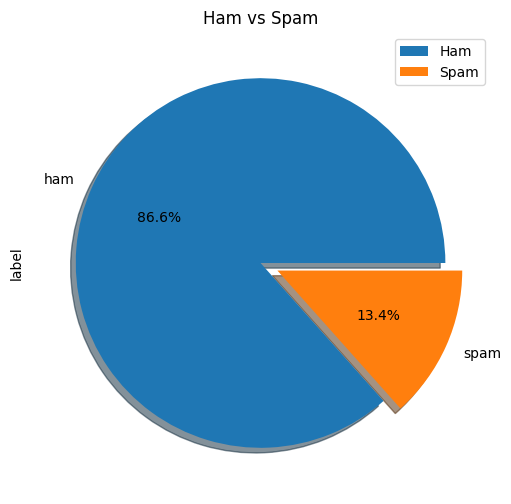

In [ ]:
df["label"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Ham vs Spam")
plt.legend(["Ham", "Spam"])
plt.show()

In [ ]:
spam_messages = df[df["label"] == "spam"]["message"]
ham_messages = df[df["label"] == "ham"]["message"]

In [ ]:
spam_words = " ".join(spam_messages)
ham_words = " ".join(ham_messages)
stopwords = set(STOPWORDS)

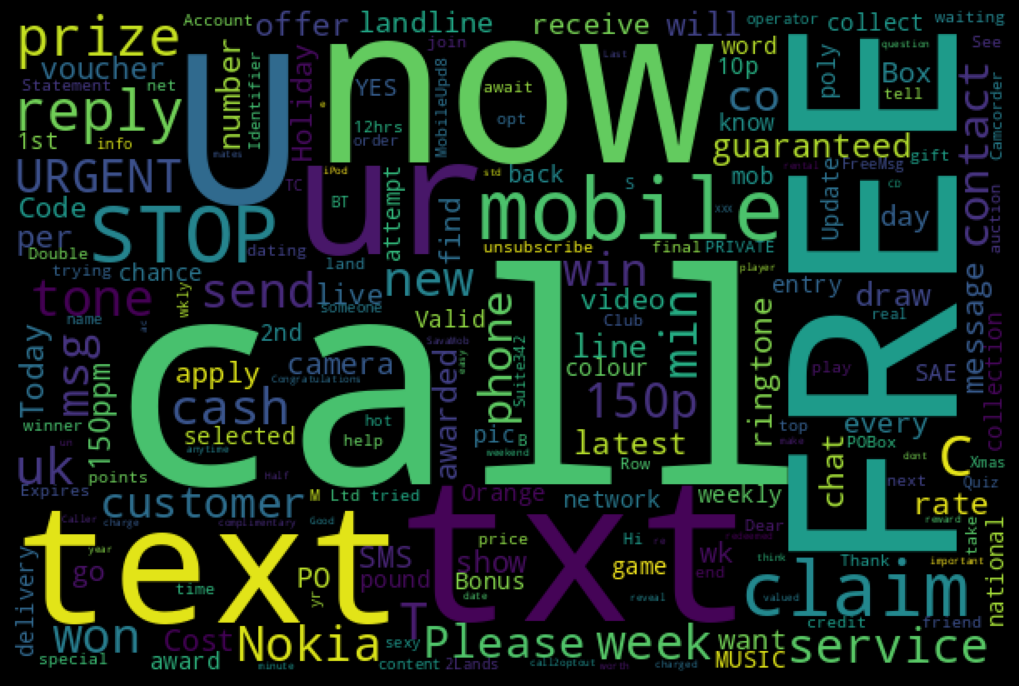

In [ ]:
spam_wordcloud = WordCloud(stopwords=stopwords, collocations=False, width=600, height=400).generate(spam_words)
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

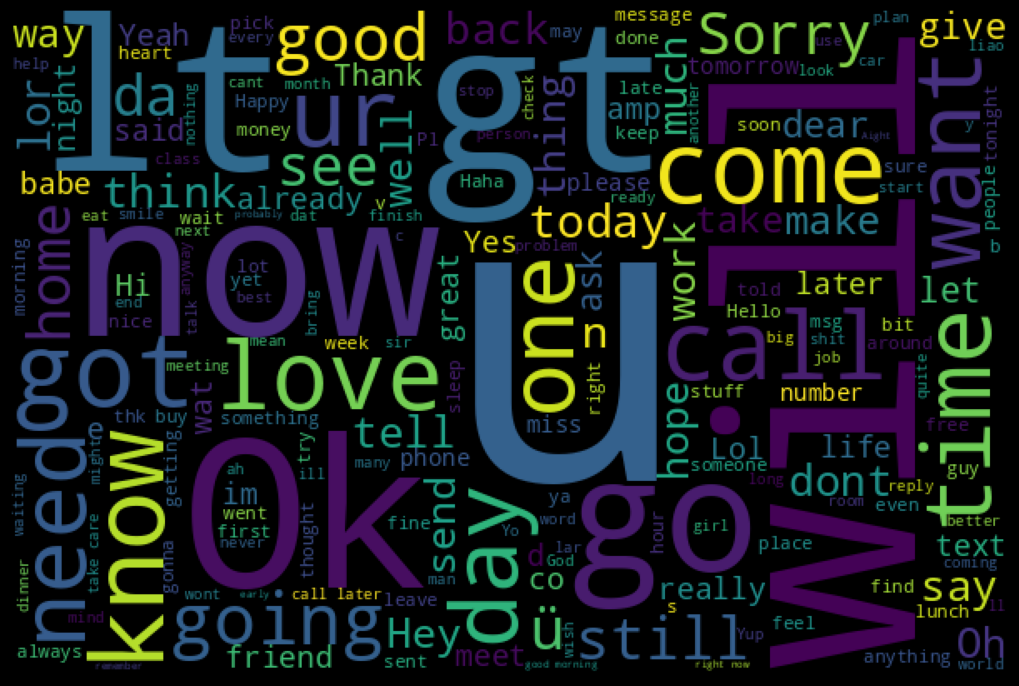

In [ ]:
ham_wordcloud = WordCloud(stopwords=stopwords, width=600, height=400).generate(ham_words)
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Text(0, 0.5, 'Frequency')

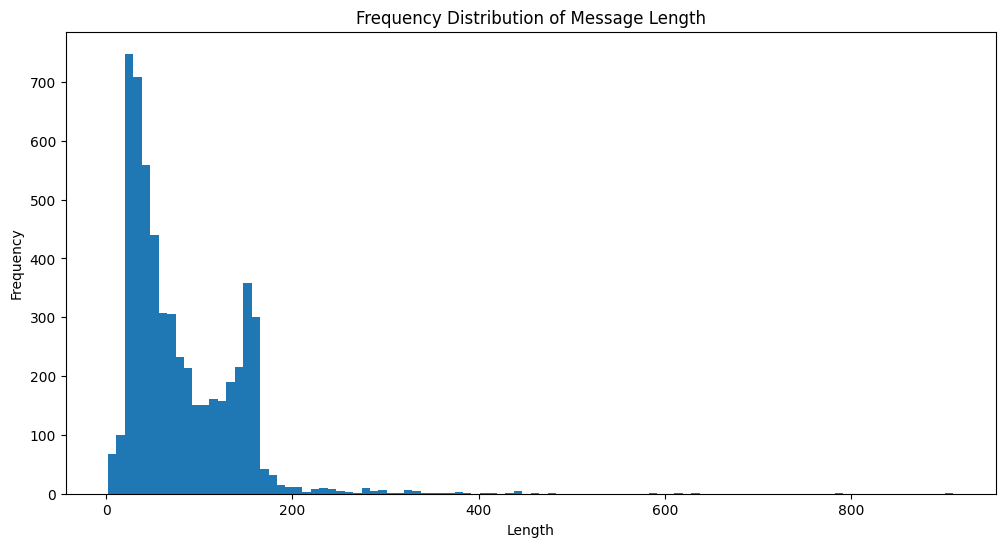

In [ ]:
plt.figure(figsize=(12,6))
df['length_original'].plot(bins=100, kind='hist') # with 100 length bins
plt.title("Frequency Distribution of Message Length")
plt.xlabel("Length")
plt.ylabel("Frequency")

In [ ]:
df['length_original'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length_original, dtype: float64

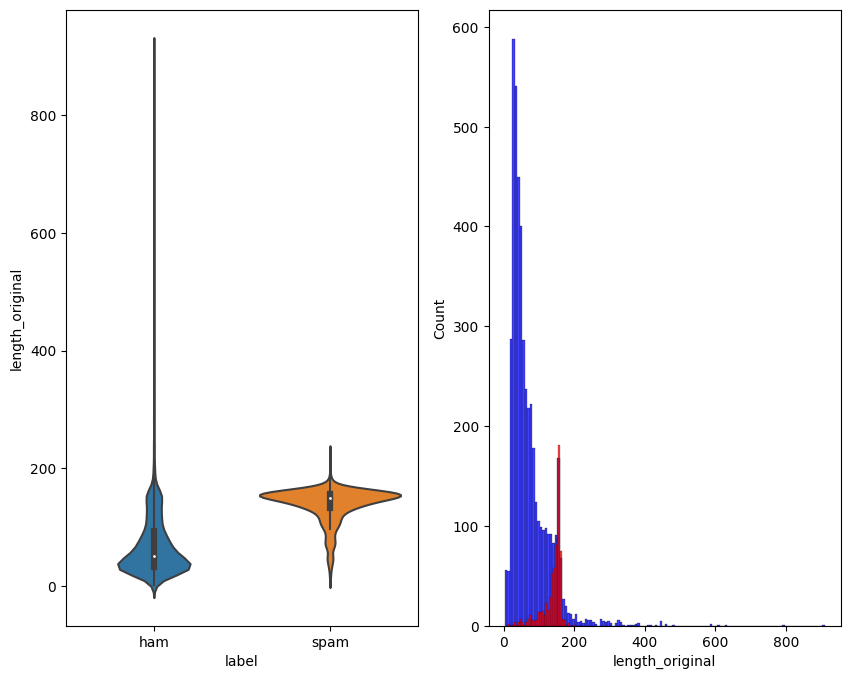

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2, 1)
sns.violinplot(x = 'label', y = 'length_original', data = df[0:] , )

plt.subplot(1,2,2)
sns.histplot(df[df['label'] == "ham"]['length_original'][0:] , label = "0" , color = 'blue' )
sns.histplot(df[df['label'] == "spam"]['length_original'][0:] , label = "1", color = 'red')
plt.show()

In [ ]:
df['u_count'] = df['message'].str.findall(r'[A-Z]').str.len()
df['u_count_ratio'] = df['u_count']/df['length_original']
df.head()

,label,message,length_original,u_count,u_count_ratio
0,ham,"Go until jurong point, crazy.. Available only ...",111,3,0.027027
1,ham,Ok lar... Joking wif u oni...,29,2,0.068966
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,10,0.064516
3,ham,U dun say so early hor... U c already then say...,49,2,0.040816
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,0.032787


In [ ]:
df['num_count'] = df['message'].apply(lambda x: sum(v.isdigit() for v in x))
df['num_count_ratio'] = df['num_count']/df['length_original']
df.head()

,label,message,length_original,u_count,u_count_ratio,num_count,num_count_ratio
0,ham,"Go until jurong point, crazy.. Available only ...",111,3,0.027027,0,0.00000
1,ham,Ok lar... Joking wif u oni...,29,2,0.068966,0,0.00000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,10,0.064516,25,0.16129
3,ham,U dun say so early hor... U c already then say...,49,2,0.040816,0,0.00000
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,0.032787,0,0.00000


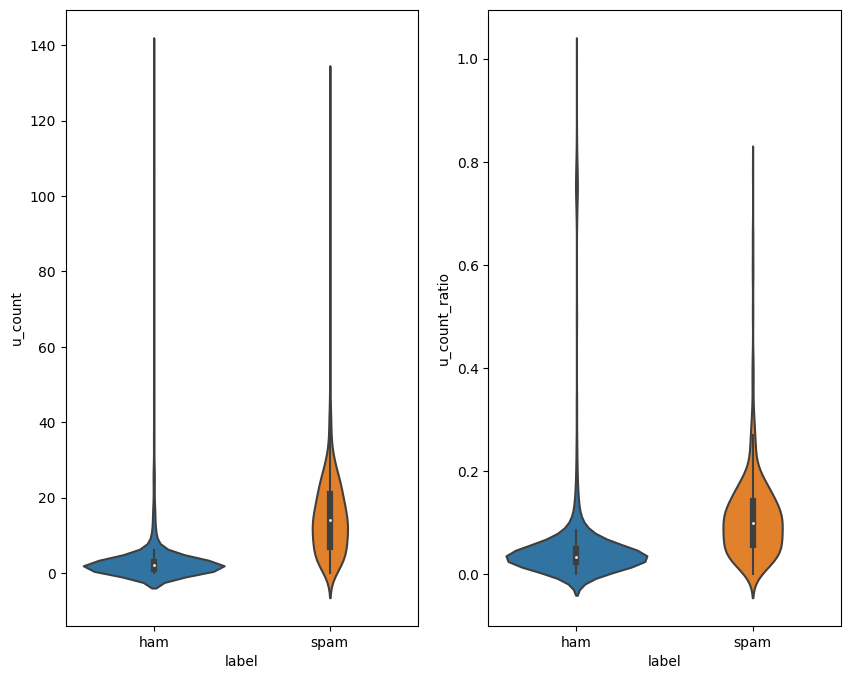

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2, 1)
sns.violinplot(x = 'label', y = 'u_count', data = df[0:] , )

plt.subplot(1,2,2)
sns.violinplot(x = 'label', y = 'u_count_ratio', data = df[0:] , )
plt.show()

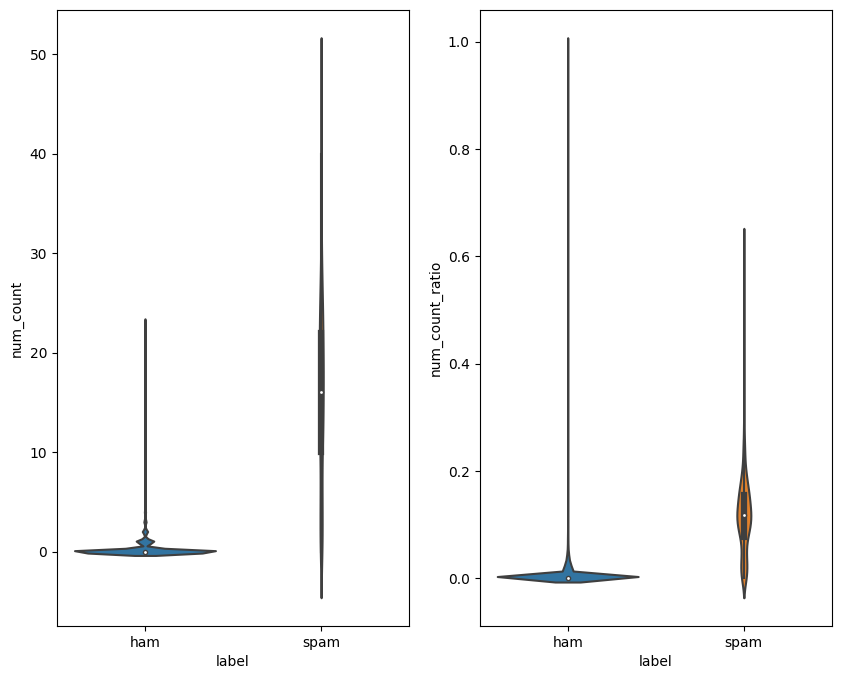

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2, 1)
sns.violinplot(x = 'label', y = 'num_count', data = df[0:] , )

plt.subplot(1,2,2)
sns.violinplot(x = 'label', y = 'num_count_ratio', data = df[0:] , )
plt.show()

## 3. Clean the Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

# convert class labels to binary values, 0 = ham and 1 = spam
encoder = LabelEncoder()
Y = encoder.fit_transform(df['label'])

print(Y[:10])

[0 0 1 0 0 1 0 0 1 1]


In [ ]:
text_msgs = df['message']
print(text_msgs[:5])

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object


In [ ]:
# Replace email addresses with 'email'
processed = text_msgs.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress', regex = True)

In [ ]:
# Replace URLs with 'urlstring'
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'urlstring', regex = True)

In [ ]:
# Replace money symbols with 'moneysymb'
processed = processed.str.replace(r'£|\$', 'moneysymb', regex = True)

In [ ]:
# Replace 10 digit phone numbers (formats include parentheses, spaces, no spaces, dashes) with 'mobilenumber'
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'mobilenumber', regex = True)

In [ ]:
# Replace numbers with 'numbr'
processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr', regex = True)

In [ ]:
# Remove punctuation
processed = processed.str.replace(r'[^\w\d\s]', ' ', regex = True)

In [ ]:
# Replace multiple spaces with a single space
processed = processed.str.replace(r'\s+', ' ', regex = True)

In [ ]:
# Remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '', regex = True)

In [ ]:
# change words to lower case
processed = processed.str.lower()
print(processed[:10])

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in numbr a wkly comp to win fa cup ...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
5    freemsg hey there darling it s been numbr week...
6    even my brother is not like to speak with me t...
7    as per your request melle melle oru minnaminun...
8    winner as a valued network customer you have b...
9    had your mobile numbr months or more u r entit...
Name: message, dtype: object


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# remove stop words from text messages

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()

processed = processed.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))

In [ ]:
df['message'] = processed
df['length_new'] = df['message'].apply(len)

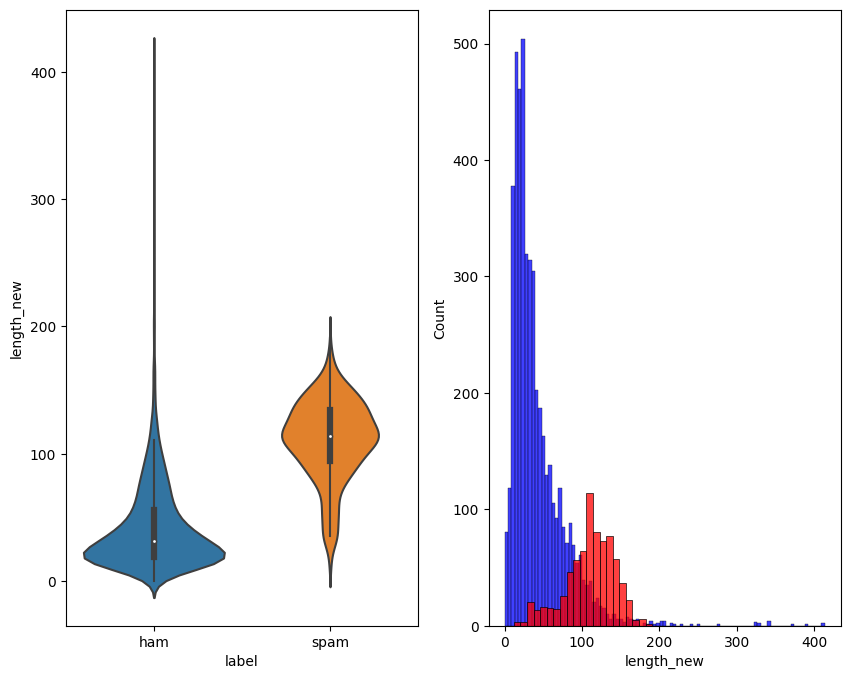

In [ ]:
# checking message length seperation still applies
plt.figure(figsize=(10, 8))

plt.subplot(1,2, 1)
sns.violinplot(x = 'label', y = 'length_new', data = df[0:] , )

plt.subplot(1,2,2)
sns.histplot(df[df['label'] == "ham"]['length_new'][0:] , label = "0" , color = 'blue' )
sns.histplot(df[df['label'] == "spam"]['length_new'][0:] , label = "1", color = 'red')
plt.show()

## 4. Create Feature Dictionary

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# bag-of-words
all_words = []

for message in processed:
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)

all_words = nltk.FreqDist(all_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# print the total number of words and the 5 most common words
print(f"Number of words: {len(all_words)}")
print(f"Most common words: {all_words.most_common(5)}")

Number of words: 6579
Most common words: [('numbr', 2648), ('u', 1207), ('call', 674), ('go', 456), ('get', 451)]


In [ ]:
# use the 200 most common words as features
word_features = list(x[0] for x in all_words.most_common(200))
print(word_features[:5])

['numbr', 'u', 'call', 'go', 'get']


In [ ]:
# The find_features function will create a dictionary with top 500 words as keys plus mesg length
# nltk's api requires this structure for the classifiers
def find_features(message, index):
    length = len(message)
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    features['cleaned_message_length'] = length
    features['total_digits_count'] = df.at[index, 'num_count']

    return features

In [ ]:
messages = list(zip(processed, Y))

# define a seed for reproducibility
seed = 1
np.random.seed = seed
np.random.shuffle(messages)

# call find_features function for each SMS message
featuresets = [(find_features(text, index), label) for index, (text, label) in enumerate(messages)]

In [ ]:
# split the data into training and testing datasets
training, testing = train_test_split(featuresets, test_size = 0.25, random_state=seed)

In [ ]:
print(len(training))
print(len(testing))

4179
1393


## 5. Classification

In [ ]:
# use sklearn algorithms in NLTK
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB

model = SklearnClassifier(MultinomialNB())

# train the model on the training data
model.train(training)

#test on the testing dataset
accuracy = nltk.classify.accuracy(model, testing)*100
print(f"Naive Bayes Accuracy: {accuracy}")

Naive Bayes Accuracy: 96.05168700646087


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Define models to train
names = ["Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing)*100
    print(f"{name} Accuracy: {accuracy}")

Decision Tree Accuracy: 96.41062455132807
Random Forest Accuracy: 97.98994974874373
Logistic Regression Accuracy: 97.98994974874373
SGD Classifier Accuracy: 96.12347451543431
Naive Bayes Accuracy: 96.05168700646087
SVM Linear Accuracy: 98.06173725771716


In [ ]:
# Ensemble method
from sklearn.ensemble import VotingClassifier

names = ["Decision Tree", "Random Forest", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = list(zip(names, classifiers))

nltk_ensemble = SklearnClassifier(VotingClassifier(estimators = models, voting = 'hard', n_jobs = -1))
nltk_ensemble.train(training)
accuracy = nltk.classify.accuracy(nltk_ensemble, testing)*100
print(f"Voting Classifier Accuracy: {accuracy}")

Voting Classifier Accuracy: 98.63603732950466


In [ ]:
# class label prediction for testing set
txt_features, labels = zip(*testing)

prediction = nltk_ensemble.classify_many(txt_features)

In [ ]:
# confusion matrix and classification report
print(classification_report(labels, prediction))

pd.DataFrame(
    confusion_matrix(labels, prediction),
    index = [['actual', 'actual'], ['ham', 'spam']],
    columns = [['predicted', 'predicted'], ['ham', 'spam']])

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1207
           1       0.99      0.91      0.95       186

    accuracy                           0.99      1393
   macro avg       0.99      0.95      0.97      1393
weighted avg       0.99      0.99      0.99      1393



predicted     
                  ham spam
actual ham       1205    2
       spam        17  169

## 6. NLP

In [ ]:
import keras
from keras import *
from keras import layers
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.models import Model
from keras.preprocessing import *
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [ ]:
from tensorflow.random import set_seed
set_seed(2)

In [ ]:
texts = df['message']
labels = Y

In [ ]:
#Create train/test sample
other_texts, test_texts, other_labels, test_labels  = train_test_split(texts, labels, test_size=0.1, random_state=302)
#Create validation sample
train_texts, valid_texts, train_labels, valid_labels  = train_test_split(other_texts, other_labels, test_size=0.2, random_state=302)

In [ ]:
# Define vocabulary size (you can tune this parameter and evaluate model performance)
VOCABULARY_SIZE = 500

In [ ]:
# Create input feature arrays
tokenizer = Tokenizer(num_words=VOCABULARY_SIZE)
tokenizer.fit_on_texts(train_texts)

# Based on EDA above
MAX_SENTENCE_LENGTH = 200
# Convert train, validation, and test text into lists with word ids
trainFeatures = tokenizer.texts_to_sequences(train_texts)
trainFeatures = pad_sequences(trainFeatures, MAX_SENTENCE_LENGTH, padding='post')
trainLabels = train_labels

validFeatures = tokenizer.texts_to_sequences(valid_texts)
validFeatures = pad_sequences(validFeatures, MAX_SENTENCE_LENGTH, padding='post')
validLabels = valid_labels

testFeatures = tokenizer.texts_to_sequences(test_texts)
testFeatures = pad_sequences(testFeatures, MAX_SENTENCE_LENGTH, padding='post')
testLabels = test_labels

In [ ]:
# Define filter and kernel size for CNN
FILTERS_SIZE = 16
KERNEL_SIZE = 5

# Define embeddings dimensions (columns in matrix fed into CNN and nodes in hidden layer of built-in keras function)
EMBEDDINGS_DIM = 10

# Hyperparameters for model tuning
LEARNING_RATE = 0.001
BATCH_SIZE = 32
EPOCHS = 7

In [ ]:
# Word CNN
model = Sequential()

# built-in keras funtion to generate embeddings.
model.add(Embedding(input_dim=VOCABULARY_SIZE + 1, output_dim=EMBEDDINGS_DIM, input_length=len(trainFeatures[0])))
model.add(Conv1D(FILTERS_SIZE, KERNEL_SIZE, activation='relu'))
model.add(Dropout(0.5))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 10)           5010      
                                                                 
 conv1d_1 (Conv1D)           (None, 196, 16)           816       
                                                                 
 dropout_2 (Dropout)         (None, 196, 16)           0         
                                                                 
 global_max_pooling1d_1 (Glo  (None, 16)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                      

In [ ]:
history = model.fit(trainFeatures, trainLabels, validation_data = (validFeatures, validLabels), batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/7
126/126 [==============================] - 2s 8ms/step - loss: 0.4600 - accuracy: 0.8659 - val_loss: 0.4244 - val_accuracy: 0.8694
Epoch 2/7
126/126 [==============================] - 1s 6ms/step - loss: 0.3066 - accuracy: 0.8823 - val_loss: 0.2491 - val_accuracy: 0.9472
Epoch 3/7
126/126 [==============================] - 1s 10ms/step - loss: 0.1838 - accuracy: 0.9374 - val_loss: 0.1574 - val_accuracy: 0.9751
Epoch 4/7
126/126 [==============================] - 1s 8ms/step - loss: 0.1188 - accuracy: 0.9658 - val_loss: 0.1180 - val_accuracy: 0.9791
Epoch 5/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0929 - accuracy: 0.9776 - val_loss: 0.0919 - val_accuracy: 0.9751
Epoch 6/7
126/126 [==============================] - 1s 6ms/step - loss: 0.0816 - accuracy: 0.9791 - val_loss: 0.0887 - val_accuracy: 0.9811
Epoch 7/7
126/126 [==============================] - 1s 6ms/step - loss: 0.0725 - accuracy: 0.9845 - val_loss: 0.0813 - val_accuracy: 0.9821


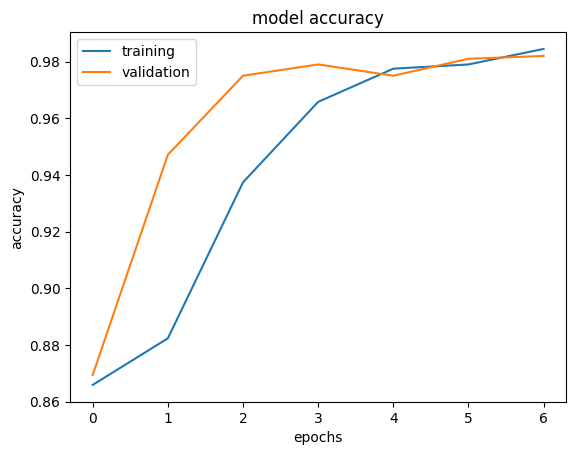

<Figure size 2000x1000 with 0 Axes>

In [ ]:
# summarize accuracy by epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper left')
plt.figure(figsize=(20,10))
plt.show()

In [ ]:
# Predict binary and probabilities
predictions_df = pd.DataFrame(model.predict(testFeatures))
predictions_binary_df = round(predictions_df)
accuracy_score(testLabels, predictions_binary_df)

18/18 [==============================] - 0s 2ms/step


0.9874551971326165

In [ ]:
print(classification_report(testLabels, predictions_binary_df))

pd.DataFrame(
    confusion_matrix(testLabels, predictions_binary_df),
    index = [['actual', 'actual'], ['ham', 'spam']],
    columns = [['predicted', 'predicted'], ['ham', 'spam']])

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       477
           1       0.99      0.93      0.96        81

    accuracy                           0.99       558
   macro avg       0.99      0.96      0.97       558
weighted avg       0.99      0.99      0.99       558



predicted     
                  ham spam
actual ham        476    1
       spam         6   75